In [2]:
import numpy as np
import keras
import pandas as pd
import joblib
from keras import Sequential
from first_test import EVENT_DICT
import first_test
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

2025-04-29 22:59:45.786044: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-29 22:59:45.786456: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 22:59:45.788876: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-29 22:59:45.795382: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745989185.808038   46649 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745989185.81

In [3]:
dev_x = np.load('dwt_najafi/dev_naj_x.npy', allow_pickle=True)
dev_y = np.load('dwt_najafi/dev_naj_y.npy', allow_pickle=True)
eval_x = np.load('dwt_najafi/eval_naj_x.npy', allow_pickle=True)
eval_y = np.load('dwt_najafi/eval_naj_y.npy', allow_pickle=True)
train_x = np.load('dwt_najafi/train_naj_x.npy', allow_pickle=True)
train_y = np.load('dwt_najafi/train_naj_y.npy', allow_pickle=True)

In [4]:
print(dev_y)
print(train_x.shape)

[0 0 0 ... 1 1 1]
(13192, 22, 40)


In [5]:
print(dev_x.shape)
print(eval_x.shape)

(8303, 22, 40)
(6532, 22, 40)


In [6]:
dev_x_tensor = tf.convert_to_tensor(dev_x)
train_x_tensor = tf.convert_to_tensor(train_x)
eval_x_tensor = tf.convert_to_tensor(eval_x)

E0000 00:00:1745989188.196445   46649 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745989188.198421   46649 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
"""dev_y.apply(lambda x: EVENT_DICT[x])
eval_y.apply(lambda x: EVENT_DICT[x])
train_y.apply(lambda x: EVENT_DICT[x])"""

'dev_y.apply(lambda x: EVENT_DICT[x])\neval_y.apply(lambda x: EVENT_DICT[x])\ntrain_y.apply(lambda x: EVENT_DICT[x])'

In [8]:
def create_model():
    model = keras.models.Sequential([
        keras.Input(shape=(22,40)),
        keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Bidirectional(keras.layers.LSTM(200, return_sequences=True, dropout=0.2093)),
        keras.layers.Bidirectional(keras.layers.LSTM(200, return_sequences=True, dropout=0.2093)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(12, activation='softmax')
    ])
    return model
model_cnn = create_model()
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 22, 64)         │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 11, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 11, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 11, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 11, 400)        │       424,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 11, 400)        │       961,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 11, 512)        │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         6,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,617,228 (6.17 MB)

 Trainable params: 1,617,228 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, ema_momentum=0.95), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model_cnn.fit(train_x_tensor, train_y, epochs=20, validation_data=(eval_x_tensor, eval_y), verbose=2)

Epoch 1/20
413/413 - 17s - 41ms/step - accuracy: 0.5399 - loss: 1.7206 - val_accuracy: 9.1855e-04 - val_loss: 2.6795
Epoch 2/20
413/413 - 12s - 30ms/step - accuracy: 0.5466 - loss: 1.5720 - val_accuracy: 9.1855e-04 - val_loss: 2.5738
Epoch 3/20
413/413 - 12s - 30ms/step - accuracy: 0.5466 - loss: 1.5590 - val_accuracy: 9.1855e-04 - val_loss: 2.4848
Epoch 4/20
413/413 - 12s - 29ms/step - accuracy: 0.5466 - loss: 1.5545 - val_accuracy: 9.1855e-04 - val_loss: 2.4328
Epoch 5/20
413/413 - 13s - 30ms/step - accuracy: 0.5464 - loss: 1.6057 - val_accuracy: 9.1855e-04 - val_loss: 2.4055
Epoch 6/20
413/413 - 12s - 30ms/step - accuracy: 0.5466 - loss: 1.5668 - val_accuracy: 9.1855e-04 - val_loss: 2.3788
Epoch 7/20
413/413 - 12s - 29ms/step - accuracy: 0.5466 - loss: 1.5559 - val_accuracy: 9.1855e-04 - val_loss: 2.4870
Epoch 8/20
413/413 - 12s - 29ms/step - accuracy: 0.5466 - loss: 1.5503 - val_accuracy: 9.1855e-04 - val_loss: 2.5093
Epoch 9/20
413/413 - 12s - 29ms/step - accuracy: 0.5466 - loss: 

In [19]:
def create_naj_model():
    model = Sequential([
        keras.Input(shape=(22, 40)),
        keras.layers.Bidirectional(keras.layers.LSTM(200, return_sequences=True)),
        #keras.layers.Bidirectional(keras.layers.LSTM(200, return_sequences=True)),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(12, activation='softmax'),
    ])
    return model
model = create_naj_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 22, 400)        │       385,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 22, 512)        │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 22, 200)        │       102,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 200)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 12)             │         2,412 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 695,924 (2.65 MB)

 Trainable params: 695,924 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(train_x_tensor, train_y, epochs=30, batch_size=150, validation_data=(eval_x_tensor, eval_y), verbose=2)

Epoch 1/30
88/88 - 8s - 95ms/step - accuracy: 0.6431 - loss: 1.1442 - val_accuracy: 0.0282 - val_loss: 3.6327
Epoch 2/30
88/88 - 6s - 71ms/step - accuracy: 0.7173 - loss: 0.8414 - val_accuracy: 0.0047 - val_loss: 3.1452
Epoch 3/30
88/88 - 6s - 71ms/step - accuracy: 0.7452 - loss: 0.7493 - val_accuracy: 0.0175 - val_loss: 2.9012
Epoch 4/30
88/88 - 6s - 71ms/step - accuracy: 0.7614 - loss: 0.6982 - val_accuracy: 0.0040 - val_loss: 3.4545
Epoch 5/30
88/88 - 6s - 73ms/step - accuracy: 0.7727 - loss: 0.6446 - val_accuracy: 0.0282 - val_loss: 3.6610
Epoch 6/30
88/88 - 6s - 71ms/step - accuracy: 0.7851 - loss: 0.6245 - val_accuracy: 0.1275 - val_loss: 3.2761
Epoch 7/30
88/88 - 6s - 73ms/step - accuracy: 0.7963 - loss: 0.5832 - val_accuracy: 0.0127 - val_loss: 4.1806
Epoch 8/30
88/88 - 6s - 72ms/step - accuracy: 0.7879 - loss: 0.6117 - val_accuracy: 0.0054 - val_loss: 4.3080
Epoch 9/30
88/88 - 6s - 71ms/step - accuracy: 0.7774 - loss: 0.6389 - val_accuracy: 0.0972 - val_loss: 3.5709
Epoch 10/3

In [22]:
cnn_pred = model_cnn.predict(dev_x_tensor)
pred = model.predict(dev_x_tensor)

260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [15]:
report_cnn = model_cnn.evaluate(dev_x_tensor, dev_y)

260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0436 - loss: 2.7283


In [23]:
report = model.evaluate(dev_x_tensor, dev_y)

260/260 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1943 - loss: 5.3156


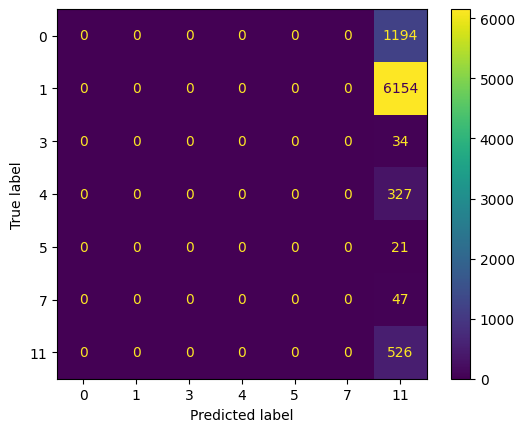

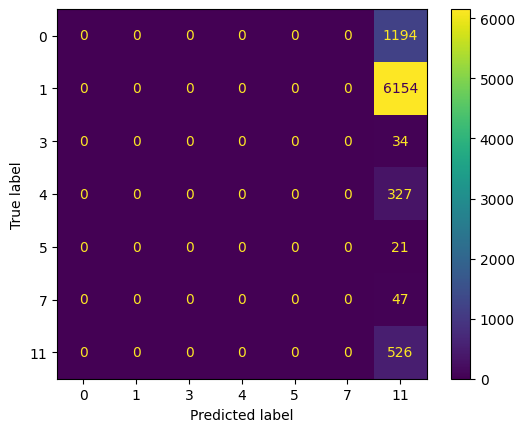

In [24]:
disp = ConfusionMatrixDisplay.from_predictions(dev_y, cnn_pred.argmax(axis=1))
disp.plot()

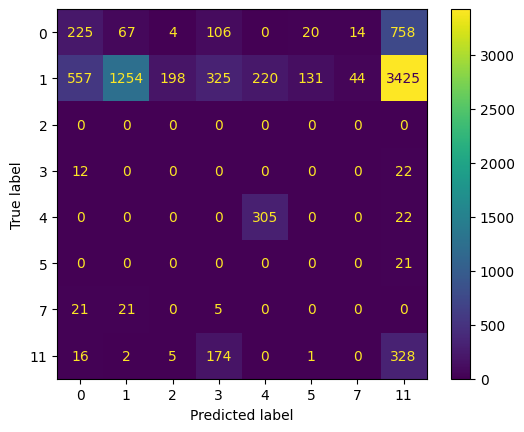

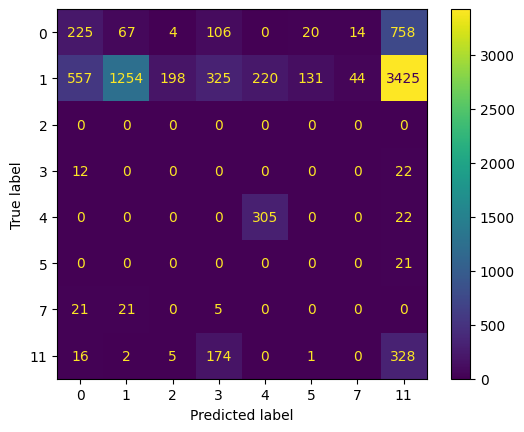

In [25]:
disp = ConfusionMatrixDisplay.from_predictions(dev_y, pred.argmax(axis=1))
disp.plot()